Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

->Boosting is an ensemble learning technique in machine learning that combines multiple weak learners (usually decision trees) to form a strong learner that performs better.

A weak learner is a model that performs slightly better than random guessing (e.g., 55–60% accuracy). Boosting sequentially trains these weak models, each trying to correct the errors made by the previous ones.

How It Improves Weak Learners:

By focusing on difficult examples, each subsequent model learns from the previous model’s mistakes.

It reduces bias and improves accuracy gradually.

The final model becomes a strong learner that generalizes better than any individual weak learner.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

->AdaBoost-

Focuses on misclassified samples by adjusting their weights.

Each weak learner is trained on a weighted dataset, where misclassified samples get higher weights in the next round.

Uses sample weighting to emphasize difficult cases.

Final prediction is a weighted majority vote (for classification).

Gradient Boosting-

Builds models to correct the residual errors of previous models.

Each new model is trained to predict the residuals (errors) made by the previous model.

Uses gradient descent to minimize a loss function.

Final prediction is the sum of all weak learner outputs.

Question 3: How does regularization help in XGBoost?

->Regularization in XGBoost helps to reduce overfitting and improve the generalization of the model. It does this by adding penalty terms to the objective function.

Here’s how it helps:

XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms that penalize trees with too many leaves or large weights.

By discouraging overly large leaf weights, it prevents the model from fitting noise in the training data.

It makes the model simpler, reducing variance while keeping bias reasonable.

The model performs better on unseen data by avoiding overfitting.

Question 4: Why is CatBoost considered efficient for handling categorical data?

->CatBoost is considered efficient for handling categorical data because of the following reasons:

No manual encoding needed:-
It automatically handles categorical features without requiring one-hot or label encoding.

Uses "Ordered Target Statistics":-
It converts categorical values into numerical values based on target statistics (like mean target value) in a way that avoids target leakage.

Efficient handling of high-cardinality features:-
It can process categorical columns with many unique values efficiently.

Built-in regularization:-
Prevents overfitting while encoding categorical data.

Faster and more accurate:-
Because encoding is optimized internally, it speeds up training and often improves accuracy.


Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

->Credit risk prediction:-
Boosting helps detect subtle patterns in financial data to identify potential loan defaulters.

Fraud detection:-
It captures rare and complex fraud patterns more effectively than bagging.

Customer churn prediction:-
Boosting models like XGBoost and LightGBM handle large datasets and improve churn forecasting accuracy.

Medical diagnosis:-
Used to classify diseases from medical data with high precision and low false negatives.

Click-through rate (CTR) prediction:-
Boosting is used in online advertising to predict whether users will click ads.

Image and text classification:-
Boosting ensembles enhance the performance of models in NLP and computer vision tasks.



In [1]:
'''Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ada_model.fit(X_train, y_train)

predictions = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"AdaBoost Model Accuracy: {accuracy * 100:.2f}%")


AdaBoost Model Accuracy: 97.37%


In [2]:
'''Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score'''

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

predictions = gbr_model.predict(X_test)
r2 = r2_score(y_test, predictions)

print(f"R-squared Score: {r2:.3f}")

R-squared Score: 0.800


In [5]:
'''Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Best Parameters:", grid_search.best_params_)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:42:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:42:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:42:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:42:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:42:07] WARNING: /w

Best Parameters: {'learning_rate': 0.1}
Model Accuracy: 95.61%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:42:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:42:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


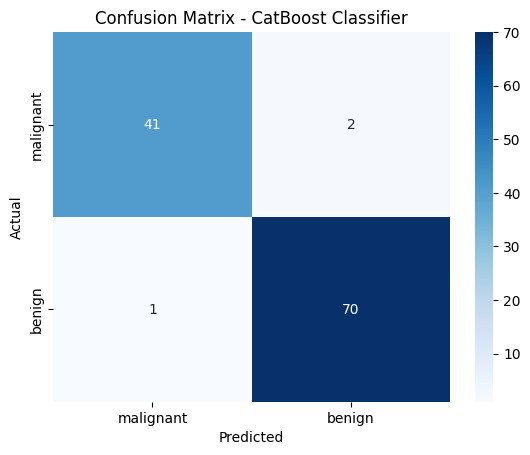

In [8]:
'''Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn'''


from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

->Step 1: Data Preprocessing

Handle missing values using median (numeric) or a new category (categorical).

Encode categorical data using:

CatBoost: automatic handling

XGBoost/AdaBoost: one-hot or target encoding

Scale not needed (boosting trees handle that).

Handle imbalance with class weights or resampling (SMOTE).

Step 2: Model Choice

CatBoost: best for mixed numeric + categorical + missing data.

XGBoost: great for large numeric datasets with fine control.

AdaBoost: simpler, but less effective for complex data.
let's choose CatBoost for this case.

Step 3: Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV.

Tune key parameters like learning_rate, depth, and n_estimators.

Use Stratified K-Fold to preserve class balance.

Step 4: Evaluation Metrics

Use Precision, Recall, F1-score, ROC-AUC (since data is imbalanced).

ROC-AUC shows overall performance; F1 balances precision & recall.

Step 5: Business Impact

Helps identify customers likely to default early.

Reduces financial risk and loss.

Supports better lending decisions and targeted risk control.